# Regression project - Socioeconomic and demographic determinants of cancer mortality

Zofia Broszczak (446277) and Anna Lorenz (429840)

Data Science and Business Analytics

# 1. Introduction

Cancer mortality remains one of the major public health challenges in the United States and exhibits substantial variation across regions. These differences cannot be explained only by biological factors and are strongly influenced by social, economic and demographic conditions. Understanding what socioeconomic status, access to healthcare and population characteristics factors are the strongest predictors of cancer mortality is really important for identifying health disparties an informing public health policy.

The goal of this project is to analyze the socioeconomic and demographic determinants of cancer mortality across U.S. counties. The dependent variable is cancer mortality rate, defined as the expected number of deaths due to cancer per 100 000 people. The project investigates whether regional differences in cancer mortality can be explained by factors such as income levels, poverty, health insurance coverage, education and population structure.

The analysis is based on the Cancer Regression dataset downloaded from Kaggle (https://www.kaggle.com/datasets/varunraskar/cancer-regression?select=cancer_reg.csv), which aggregates county-level data for the United Stated. The dataset includes demographics variables (e.g. population size, median age, racial composition), socioeconomic indicators (e.g. median income, poverty rate, education levels) and healthcare-related variables (e.g. health insurance coverage). Additionally the dataset contains cancer-related indicators such as average annual cancer cases and deaths, which provide contextual information about disease at the county level.

In this project several regression models are developed and compared, including a decision tree regressor and ensemble approaches such as random forest and gradient boosting. Model performance is evaluated using multiple error metrics and validation techniques to ensure reliable and unbiased assessment. Overall, the project aims not only to achieve accurate predictions of cancer mortality rates, but also to identify the key factors associated with regional differences in cancer mortality across the United States.

### Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# 2. Data description and preparation

The analysis is based on the cancer_reg.csv file from Cancer Regression dataset available on Kaggle. This file contains county-level data for the United States and is designed for regression analysis of cancer mortality outcomes. Each observation corresponds to a single U.S. county and includes a combination of demographic, socioeconomic, healthcare-related and cancer-specific variables.

The dependent variable used in this project is target_deathrate, which represents the expected number of cancer-related deaths per 100 000 people. The dataset includes several cancer-related indicators, such as the average annual number of cancer diagnoses (avganncount), average annual number of cancer deaths (avgdeathsperyear) and cancer incidence rate (incidencerate).

In addition to cancer statistics, the dataset contains a set of explanatory variables describing county characteristics. These include demographic features such as median age variables (medianage, medianagemale, medianagefemale), racial composition (pctwhite, pctblack, pctasian, pcttotherace) and birth rate (birthrate). There are also socioeconomic conditions captures through variables such as median household income (medincome), poverty rate (povertypercent), education levels (pctnohs18_24, pcths18_24, pctbachdeg25_over) and per-capita study expenditure (studypercap). Access to healthcare is represented by multiple insurance coverage indicators such as private and public coverage rates (pctprivatecoverage, pctpubliccoverage, pctprivatecoveragealone, pctpubliccoveragealone). Together these variables enable a detailed analysis of how strong socioeconomic status, demographic structure and healthcare access are associated with regional differences in cancer mortality across U.S. counties.

## 2.1. Data loading

In [2]:
data = pd.read_csv("data/cancer_reg.csv")
data.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

# 3. Exploratory data analysis

The exploratory data analysis aims to gain an initial understanding of the dataset by checking variable distributions, summary statistics and potential data issues that may influence modelling steps.

## 3.1 Target variable

In [4]:
y = data["target_deathrate"]
y.describe()

count    3047.000000
mean      178.664063
std        27.751511
min        59.700000
25%       161.200000
50%       178.100000
75%       195.200000
max       362.800000
Name: target_deathrate, dtype: float64

The target cancer mortality rate has a mean of approximately 178 deaths per 100 000 people, with most counties falling between 161 and 195. Small number of counties shows higher mortality rates indicating moderate variability and the presence of extreme cases.

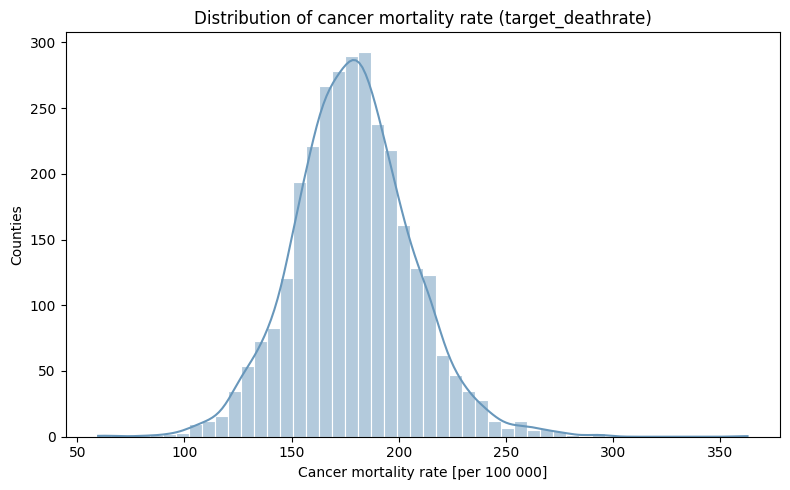

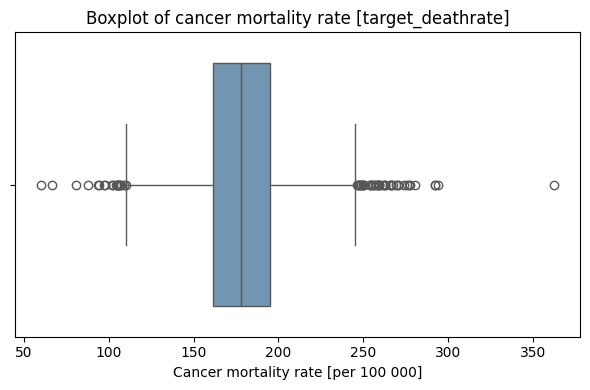

In [5]:
# Distribution plot
plt.figure(figsize = (8, 5))
sns.histplot(y, bins = 50, kde = True, color = "#6897bb", edgecolor = "white")
plt.xlabel("Cancer mortality rate [per 100 000]")
plt.ylabel("Counties")
plt.title("Distribution of cancer mortality rate (target_deathrate)")
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize = (6, 4))
sns.boxplot(x = y, color = "#6897bb")
plt.xlabel("Cancer mortality rate [per 100 000]")
plt.title("Boxplot of cancer mortality rate [target_deathrate]")
plt.tight_layout()
plt.show()

The distribution of the target variable is approximately shaped as normal distribution, with most observations concentrated around the mean and a light right skew. The boxplot confirms the presence of outliers on both ends, mostly on higher end, showing regions with unusually high mortality rates.

## 3.2. Checking missing values and data quality

In [6]:
data.isna().sum().sort_values(ascending = False)

pctsomecol18_24            2285
pctprivatecoveragealone     609
pctemployed16_over          152
pctbachdeg18_24               0
pctmarriedhouseholds          0
pctotherrace                  0
pctasian                      0
pctblack                      0
pctwhite                      0
pctpubliccoveragealone        0
pctpubliccoverage             0
pctempprivcoverage            0
pctprivatecoverage            0
pctunemployed16_over          0
pctbachdeg25_over             0
pcths25_over                  0
avganncount                   0
avgdeathsperyear              0
pcths18_24                    0
pctnohs18_24                  0
percentmarried                0
geography                     0
medianagefemale               0
medianagemale                 0
medianage                     0
binnedinc                     0
studypercap                   0
povertypercent                0
popest2015                    0
medincome                     0
incidencerate                 0
target_d

Looking at the table above, most variables contain complete data. However, we can observe that the variable "pctsomecol18_24" has around 75% of missing values, the variable "pctprivatecoveragealone" has around 20% of missing values and the variable "pctemployed16_over" has around 5% of missing values. Because of the high level of missingness "pctsomecol18_24" was excluded from further analysis, as imputing that big proportion of missing data could introduce significant noise and bias. The rest of the variables with missing values were handled during preprocessing using median imputation. 

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
avganncount,3047.0,606.338544,1416.356223,6.000000,76.000000,171.000000,518.000000,3.815000e+04
avgdeathsperyear,3047.0,185.965868,504.134286,3.000000,28.000000,61.000000,149.000000,1.401000e+04
target_deathrate,3047.0,178.664063,27.751511,59.700000,161.200000,178.100000,195.200000,3.628000e+02
incidencerate,3047.0,448.268586,54.560733,201.300000,420.300000,453.549422,480.850000,1.206900e+03
medincome,3047.0,47063.281917,12040.090836,22640.000000,38882.500000,45207.000000,52492.000000,1.256350e+05
popest2015,3047.0,102637.370528,329059.220504,827.000000,11684.000000,26643.000000,68671.000000,1.017029e+07
povertypercent,3047.0,16.878175,6.409087,3.200000,12.150000,15.900000,20.400000,4.740000e+01
studypercap,3047.0,155.399415,529.628366,0.000000,0.000000,0.000000,83.650776,9.762309e+03
medianage,3047.0,45.272333,45.304480,22.300000,37.700000,41.000000,44.000000,6.240000e+02
medianagemale,3047.0,39.570725,5.226017,22.400000,36.350000,39.600000,42.500000,6.470000e+01


Summary statistics show differences across counties in terms of socioeconomic conditions, healthcare coverage and demographic structure. Several variables such as population size (popest2015), cancer-related counts (avganncount, avgdeathsperyear) and per-capita study expenditure (studypercap) shows strong right-skewness and extreme values, which indicates presence of outliers. In contrast percentage-based variables (e.g. poverty rage, insurance coverage, education levels) show more moderate dispersion, which suggest relatively stale proportional differences across counties.

Apart from the median age variable (medianage), which contains outliers exceeding realistic human age limits, the remaining extreme values are not removed as they represent real regional variation and can be effectively handled by tree-based models.

In [8]:
data.duplicated().sum()

np.int64(0)

No duplicate observations were found in the dataset showing that each county is represented by a unique record.

## 3.3. Checking target with selected features

Selected variables were chosen to represent key groups relevant to the research question, including socioeconomic status (povertypercent, medincome), healthcare access (pctprivatecoverage) and demographic structure (medianage). This selection enables an interpretable exploratory assessment of how these factors relate to cancer mortality before model training.

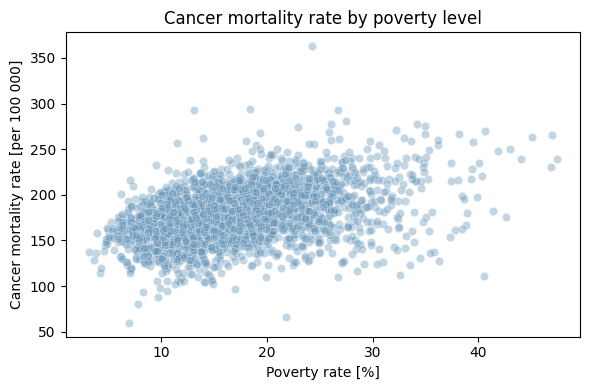

In [9]:
# Scatter plot
plt.figure(figsize = (6, 4))
sns.scatterplot(x = data["povertypercent"], y= y, alpha = 0.4, color = "#6897bb")
plt.xlabel("Poverty rate [%]")
plt.ylabel("Cancer mortality rate [per 100 000]")
plt.title("Cancer mortality rate by poverty level")
plt.tight_layout()
plt.show()

The scatter plot shows a positive relationship between poverty level and cancer mortality rate. Counties with higher poverty percentages tend to show higher cancer mortality rate.

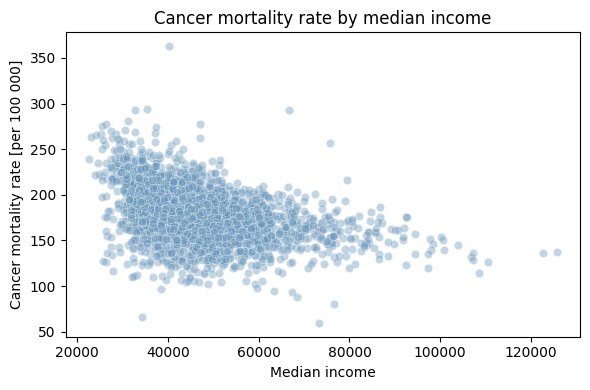

In [10]:
# Scatter plot
plt.figure(figsize = (6, 4))
sns.scatterplot(x = data["medincome"], y = y, alpha = 0.4, color = "#6897bb")
plt.xlabel("Median income")
plt.ylabel("Cancer mortality rate [per 100 000]")
plt.title("Cancer mortality rate by median income")
plt.tight_layout()
plt.show()

A negative relationship is shown between median income and cancer mortality rate. Counties with lower median incomes show both higher average death rates and greater variability, while higher income counties tend to have lower and more stable mortality rates.

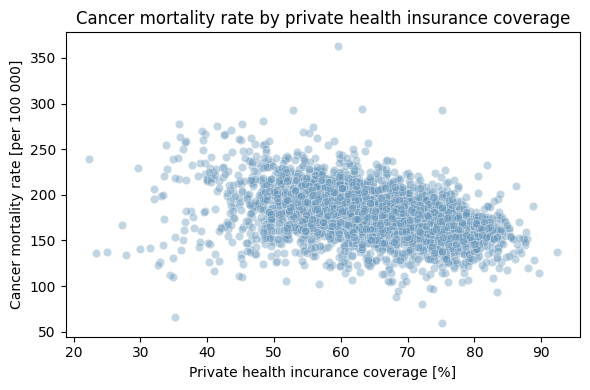

In [11]:
# Scatter plot
plt.figure(figsize = (6, 4))
sns.scatterplot(x = data["pctprivatecoverage"], y = y, alpha = 0.4, color = "#6897bb")
plt.xlabel("Private health incurance coverage [%]")
plt.ylabel("Cancer mortality rate [per 100 000]")
plt.title("Cancer mortality rate by private health insurance coverage")
plt.tight_layout()
plt.show()

The plot shows that greater access to the private health insurance is associated with lower cancer mortality. Higher levels of private coverage correspond to both lower death rates and reduced variability, showing the potential role of healthcare access in cancer outcomes.

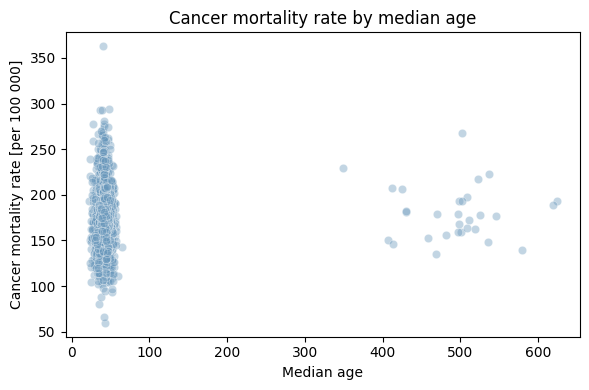

In [12]:
# Scatter plot
plt.figure(figsize = (6, 4))
sns.scatterplot(x = data["medianage"], y = y, alpha = 0.4, color = "#6897bb")
plt.xlabel("Median age")
plt.ylabel("Cancer mortality rate [per 100 000]")
plt.title("Cancer mortality rate by median age")
plt.tight_layout()
plt.show()

The relationship between median age and cancer mortality looks unclear because of the presence of extreme values. That indicates potential data quality issues or encoding artifacts and will be handled during preprocessing to prevent distortion of the models.

## 3.4. Correlation analysis

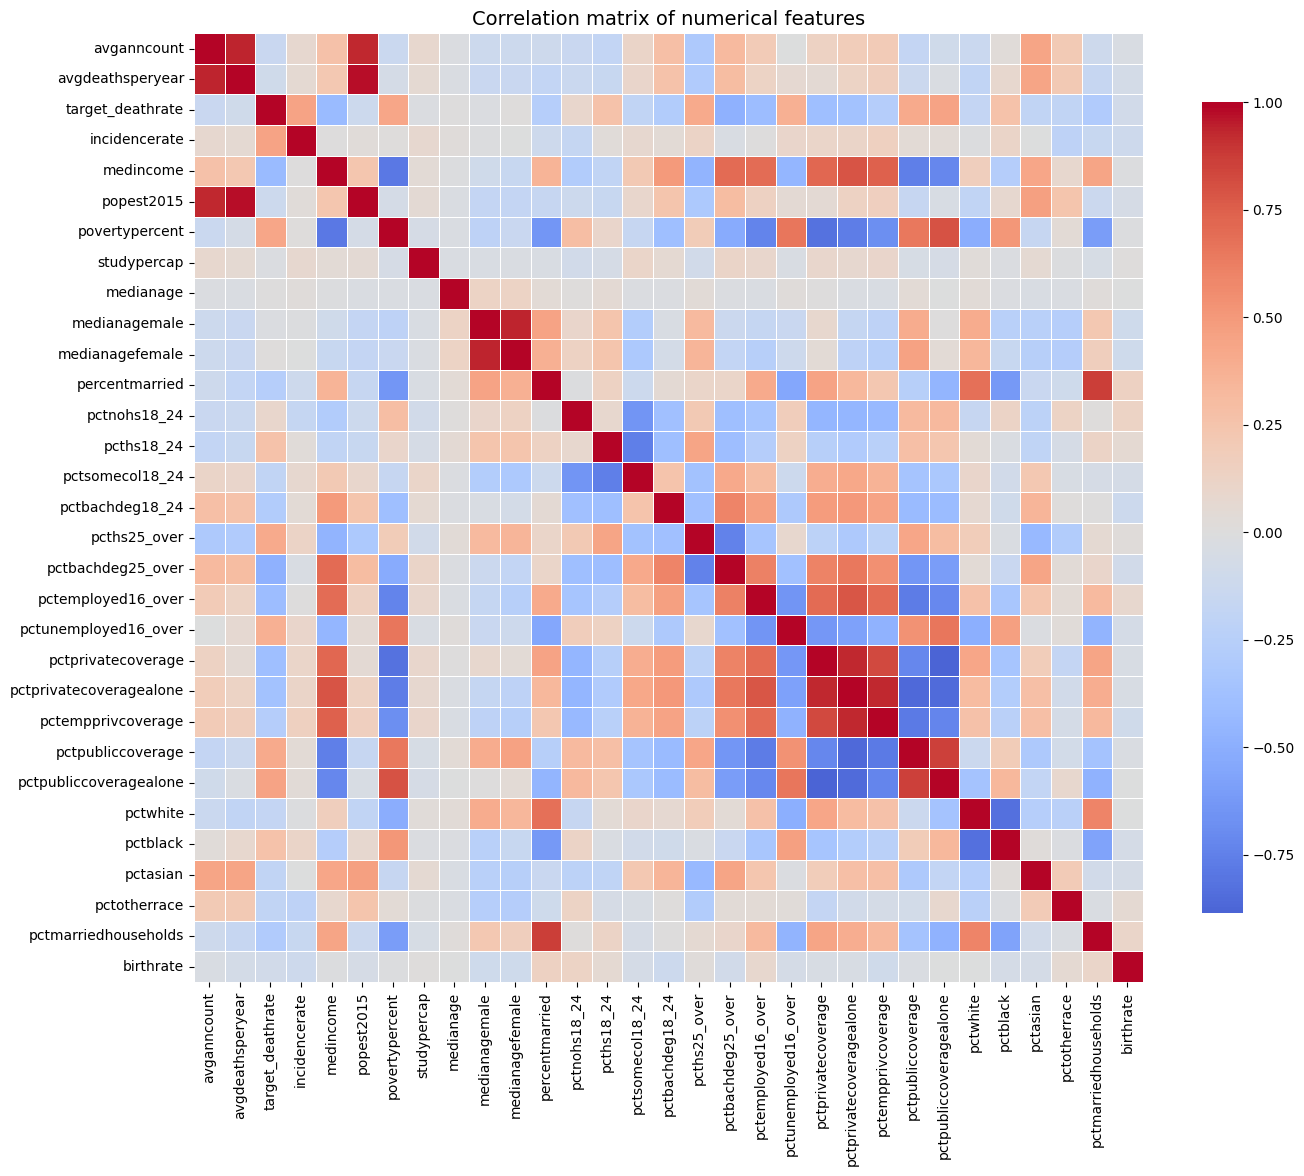

In [13]:
numeric_data = data.select_dtypes(include = [np.number])
corr_matrix = numeric_data.corr()

# Heatmap plot
plt.figure(figsize = (14, 12))
sns.heatmap(corr_matrix, cmap = "coolwarm", center = 0, square = True, linewidths = 0.5, cbar_kws = {"shrink": 0.8})
plt.title("Correlation matrix of numerical features", fontsize = 14)
plt.tight_layout()
plt.show()

The correlation matrix reveals strong relationships within groups of related variables such as age-related and healthcare coverage indicators, which is expected given their conceptual similarity. No single features exhibits an extremely strong correlation with the target variable, suggesting the absence of direct target leakage. 

Since tree-based models are robust to multicollinearity, these correlations are interpreted as informative patterns rather than methodological issues.

# 4. Preprocessing

This step prepares the dataset for modeling by handling missing values, addressing implausible observations and ensuring that the input features are in a suitable format for machine learning logarithms.

## 4.1. Dropping columns

Based on the EDA several variables were removed during preprocessing. The columns "geography" and "binnedinc" were excluded as they do not add explanatory value beyond existing numerical features, while "pctsomecol18_24" was dropped due to a high proportion of missing values.

In [14]:
data_clean = data.drop(columns = ["pctsomecol18_24", "geography", "binnedinc"])
data_clean.shape

(3047, 30)

## 4.2. Clipping implausible age values

Implausible values in the median age were clipped to a realistic range. 

In [15]:
data_clean["medianage"] = data_clean["medianage"].clip(lower = 0, upper = 100)
data_clean["medianage"].describe()

count    3047.000000
mean       41.406498
std         7.803323
min        22.300000
25%        37.700000
50%        41.000000
75%        44.000000
max       100.000000
Name: medianage, dtype: float64

## 4.3. Splitting data into features and target

In [16]:
X = data_clean.drop(columns = ["target_deathrate"])
y = data_clean["target_deathrate"]

print("X shape:", X.shape)
print("Y shape:", y.shape)

X shape: (3047, 29)
Y shape: (3047,)


## 4.4. Checking features types

In [17]:
numeric_features = X.select_dtypes(include = ["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include = ["object"]).columns.tolist()

print("Numeric features:\n", len(numeric_features))
print("Categorical features;\n", len(categorical_features))

Numeric features:
 29
Categorical features;
 0


After preprocessing the dataset consists of numerical features (29 variables) with no categorical features remaining. That ensures compatibility with tree-based regression models without the need for additional encoding.

## 4.5. Preprocessing pipeline

In [18]:
numeric_transformer = Pipeline(
    steps = [
        ("imputer", SimpleImputer(strategy = "median"))
])

preprocessor = ColumnTransformer(
    transformers = [
        ("num", numeric_transformer, numeric_features)
    ]
)

# 5. Machine learning models

## 5.1. Train and test setup

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Train size:\n", X_train.shape)
print("Test size:\n", X_test.shape)

Train size:
 (2437, 29)
Test size:
 (610, 29)


## 5.2. Baseline model

A DummyRegressor was used as a baseline model, as recommended in the scikit-learn documentation (scikit-learn developers, 2024).

In [20]:
baseline = Pipeline(
    steps = [
        ("preprocessor", preprocessor),
        ("model", DummyRegressor(strategy = "mean"))
    ]
)

baseline.fit(X_train, y_train)
y_pred_baseline = baseline.predict(X_test)

# Function to report common regression evaluation metrics (RMSE, MAE, R^2)
def report(y_true, y_pred, prefix=''):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"{prefix}RMSE={rmse:.4f} | MAE={mae:.4f} | R^2={r2:.4f}")
    return rmse, mae, r2

print("Test:")
_ = report(y_test, baseline.predict(X_test), prefix='  ')

Test:
  RMSE=28.6063 | MAE=22.2875 | R^2=-0.0001


The baseline model achieves an R^2 close to zero, which is expected because it predicts a constant mean value and does not capture any relationship between features and the target. 

The baseline errors (RMSE = 28.6063 and MAE = 22.2875 on the test set) define the minimum performance threshold that more complex models should exceed.

## 5.3. Decision tree

Decision trees are capable of capturing non-linear relationships, interactions and threshold effects in the data while remaining relatively interpretable. At the same time, they are prone to overfitting, which makes careful hyperparameter tuning essential for achieving good generalization.

In [21]:
decision_tree_pipeline = Pipeline(
    steps = [
        ("preprocessor", preprocessor),
        ("model", DecisionTreeRegressor(random_state = 42))
    ]
)

param_grid_decision_tree = {
    "model__max_depth": [None, 3, 4, 5, 8, 10],
    "model__min_samples_split": [2, 5, 10, 50, 100],
    "model__min_samples_leaf": [1, 5, 10, 20],
    "model__max_features": [None, "sqrt", "log2"],
    "model__ccp_alpha": [0.0, 1e-4, 5e-4, 1e-3, 5e-3],
    "model__criterion": ["squared_error", "friedman_mse"]
}

decision_tree_search = GridSearchCV(
    estimator = decision_tree_pipeline,
    param_grid = param_grid_decision_tree,
    scoring = "neg_root_mean_squared_error",
    cv = 5,
    n_jobs = -1
)

In [22]:
decision_tree_search.fit(X_train, y_train)

print("Best parameters:\n", decision_tree_search.best_params_)
print("Best CV RMSE:\n", -decision_tree_search.best_score_)

Best parameters:
 {'model__ccp_alpha': 0.0, 'model__criterion': 'squared_error', 'model__max_depth': 8, 'model__max_features': None, 'model__min_samples_leaf': 20, 'model__min_samples_split': 100}
Best CV RMSE:
 21.41591990824225


The best-performing decision tree model was obtained with moderate depth and strong regularization (larger minimum samples per split and leaf), achieving RMSE of approximately 21.4. The RMSE shows improved generaliation compared to baseline model.

In [23]:
decision_tree_best = decision_tree_search.best_estimator_

y_train_pred_decision_tree = decision_tree_best.predict(X_train)
y_test_pred_decision_tree = decision_tree_best.predict(X_test)

print("Decision tree results:\n") 
print("Train:")
_ = report(y_train, y_train_pred_decision_tree, prefix='  ')
print("Test:")
_ = report(y_test, y_test_pred_decision_tree, prefix='  ')

Decision tree results:

Train:
  RMSE=18.3512 | MAE=13.6440 | R^2=0.5556
Test:
  RMSE=21.9454 | MAE=16.3134 | R^2=0.4114


The tuned decision tree regressor outpreforms the baseline model, reducing RMSE by over 20% and explaining more than 40% of the variance in cancer mortality rates on unseen data.

## 5.4. Random Forest

Random forest reduces overfitting by averaging predictions from many decision trees trained on bootstrap samples feature subsampling. It improves generalization compared to a single decision tree.

In [24]:
random_forest_pipeline = Pipeline(
    steps = [
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(random_state = 42, n_jobs = 1))
    ]
)

param_grid_random_forest = {
    "model__n_estimators": [300, 600],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_leaf": [2, 5, 10],
    "model__max_features": ["sqrt", 0.5, None],
    "model__min_samples_split": [2, 10, 50]
}

random_forest_search = GridSearchCV(
    estimator = random_forest_pipeline,
    param_grid = param_grid_random_forest,
    scoring = "neg_root_mean_squared_error",
    cv = 5,
    n_jobs = -1
)

In [25]:
random_forest_search.fit(X_train, y_train)

print("Best parameters:\n", random_forest_search.best_params_)
print("Best CV RMSE:\n", -random_forest_search.best_score_)

Best parameters:
 {'model__max_depth': 20, 'model__max_features': 0.5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 600}
Best CV RMSE:
 18.648551778105137


The hyperparameters show a moderately complex random forest with controlled tree depth and sample-based regularization.

In [26]:
random_forest_best = random_forest_search.best_estimator_

y_train_pred_random_forest = random_forest_best.predict(X_train)
y_test_pred_random_forest = random_forest_best.predict(X_test)

print("Random forest results:\n") 
print("Train:")
_ = report(y_train, y_train_pred_random_forest, prefix='  ')
print("Test:")
_ = report(y_test, y_test_pred_random_forest, prefix='  ')

Random forest results:

Train:
  RMSE=8.1174 | MAE=5.6599 | R^2=0.9130
Test:
  RMSE=18.8726 | MAE=13.8283 | R^2=0.5647


The random forest model outperforms the baseline and decision tree models, achieving lower prediction error and improved explanatory power on test data.

## 5.5. Gradient Boosting

Gradient boosting builds an ensamble of shallow trees sequentially, where each new tree corrects the errors of the previous ones. This approach often achieves strong predictive performance while controlling bias and variance through learning rate and tree depth.

In [27]:
gradient_boosting_pipeline = Pipeline(
    steps = [
        ("preprocessor", preprocessor),
        ("model", GradientBoostingRegressor(random_state = 42))
    ]
)

param_grid_gradient_boosting = {
    "model__n_estimators": [200, 500],
    "model__learning_rate": [0.1, 0.15, 0.2],
    "model__max_depth": [1, 2, 3],
    "model__min_samples_leaf": [10, 20, 30],
    "model__subsample": [0.8, 1.0]
}

gradient_boosting_search = GridSearchCV(
    estimator = gradient_boosting_pipeline,
    param_grid = param_grid_gradient_boosting,
    scoring = "neg_root_mean_squared_error",
    cv = 5,
    n_jobs = -1
)

In [28]:
gradient_boosting_search.fit(X_train, y_train)

print("Best parameters:\n", gradient_boosting_search.best_params_)
print("Best CV RMSE:\n", -gradient_boosting_search.best_score_)

Best parameters:
 {'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__min_samples_leaf': 20, 'model__n_estimators': 500, 'model__subsample': 0.8}
Best CV RMSE:
 15.197764971091393


The optimal gradient boosting configuration combines a relatively high learning rate with shallow trees and subsampling.

In [29]:
gradient_boosting_best = gradient_boosting_search.best_estimator_

y_train_pred_gradient_boosting = gradient_boosting_best.predict(X_train)
y_test_pred_gradient_boosting = gradient_boosting_best.predict(X_test)

print("Gradient boosting results:\n") 
print("Train:")
_ = report(y_train, y_train_pred_gradient_boosting, prefix='  ')
print("Test:")
_ = report(y_test, y_test_pred_gradient_boosting, prefix='  ')

Gradient boosting results:

Train:
  RMSE=4.2503 | MAE=3.3183 | R^2=0.9762
Test:
  RMSE=15.5504 | MAE=11.0997 | R^2=0.7045


The gradient boosting model achieves the best predictive performane on the test set.

The model fits the training data very closely, which leads to higher errors on unseen data. However, despite this overfitting, the model still generalizes well and explains over 70% of the variance in cancer mortality rates.

# 6. Model evaluation and comparison

## 6.1. Model performance comparison table

In [30]:
rmse_baseline, mae_baseline, r2_baseline = report(y_test, baseline.predict(X_test), prefix='  ')
rmse_decision_tree, mae_decision_tree, r2_decision_tree = report(y_test, decision_tree_best.predict(X_test), prefix='  ')
rmse_random_forest, mae_random_forest, r2_random_forest = report(y_test, random_forest_best.predict(X_test), prefix='  ')
rmse_gradient_boosting, mae_gradient_boosting, r2_gradient_boosting = report(y_test, gradient_boosting_best.predict(X_test), prefix='  ')

  RMSE=28.6063 | MAE=22.2875 | R^2=-0.0001
  RMSE=21.9454 | MAE=16.3134 | R^2=0.4114
  RMSE=18.8726 | MAE=13.8283 | R^2=0.5647
  RMSE=15.5504 | MAE=11.0997 | R^2=0.7045


In [31]:
final_results = pd.DataFrame([
    {"Model": "Baseline", "RMSE": rmse_baseline, "MAE": mae_baseline, "R2": r2_baseline},
    {"Model": "Decision tree", "RMSE": rmse_decision_tree, "MAE": mae_decision_tree, "R2": r2_decision_tree},
    {"Model": "Random forest", "RMSE": rmse_random_forest, "MAE": mae_random_forest, "R2": r2_random_forest},
    {"Model": "Gradient boosting", "RMSE": rmse_gradient_boosting, "MAE": mae_gradient_boosting, "R2": r2_gradient_boosting}
])

final_results

,Model,RMSE,MAE,R2
0,Baseline,28.606332,22.287501,-0.000094
1,Decision tree,21.945398,16.313391,0.411423
2,Random forest,18.872618,13.828330,0.564708
3,Gradient boosting,15.550365,11.099726,0.704473


The results show an improvement in predictive performance from the baseline model through complex tree-based methods, with gradient boosting achieving the lowest prediction errors and the highest explanatory power compared to the other models.

## 6.2. Error analysis

To better understand where and why the models perform less accurately we examined the prediction errors of the final model.

In [32]:
errors = y_test - gradient_boosting_best.predict(X_test)

errors.describe()

count    610.000000
mean      -0.149218
std       15.562410
min      -76.154905
25%       -8.690920
50%       -0.496734
75%        7.652011
max      121.489134
Name: target_deathrate, dtype: float64

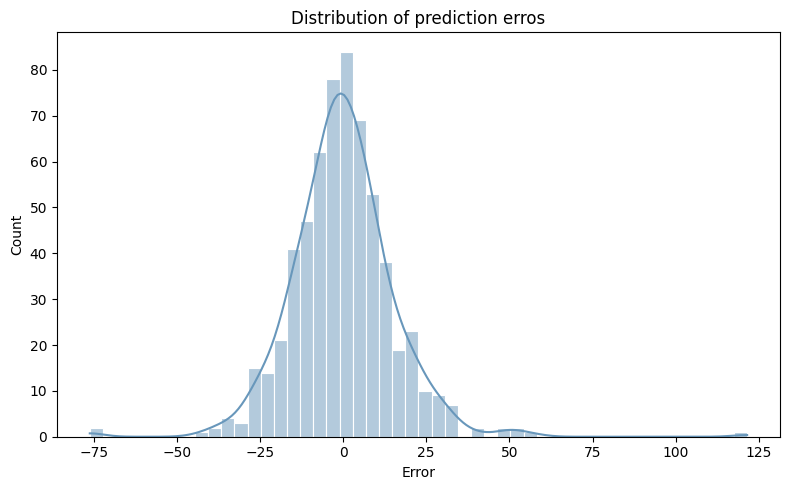

In [33]:
plt.figure(figsize = (8, 5))
sns.histplot(errors, bins = 50, kde = True, color = "#6897bb", edgecolor = "white")
plt.xlabel("Error")
plt.ylabel("Count")
plt.title("Distribution of prediction erros")
plt.tight_layout()
plt.show()

The distribution of prediction errors is centered closed to zero, that shows no systematic bias in overestimation or underestimation of cancer mortality rates. The error histogram shows approximately symmetric shape with slight right tail, which means that while most of the predictions are accurate, the model occasionally underestimates mortality in a small number of counties.

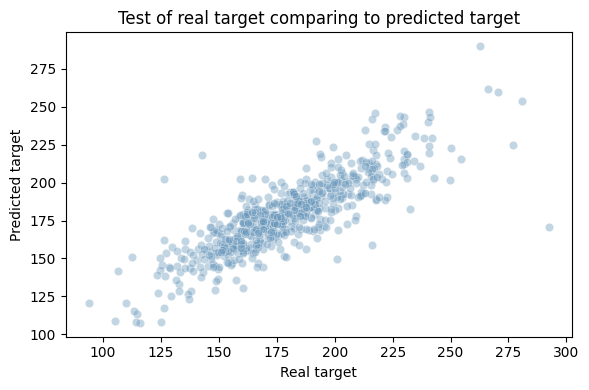

In [34]:
y_pred = gradient_boosting_best.predict(X_test)

plt.figure(figsize = (6, 4))
sns.scatterplot(x = y_test, y = y_pred, alpha = 0.4, color = "#6897bb")
plt.xlabel("Real target")
plt.ylabel("Predicted target")
plt.title("Test of real target comparing to predicted target")
plt.tight_layout()
plt.show()

The real versus predicted values plot shows a strong positive relationship between observed and predicted cancer mortality rates. Most points are aligned along the diagonal, reflecting good overall predictive performance. Larger deviations are mainly observed for counties with the highest mortality levels, where the model tends to underestimate extreme values, suggesting that some local or unobserved factors may not be fully captured by the model.

## 6.3. Feature importance

In [35]:
# Feature importance function
def get_feature_importance(pipeline, top_k = 20):
    model = pipeline.named_steps["model"]
    feature_names = pipeline.named_steps["preprocessor"]

    feature_names = preprocessor.get_feature_names_out()
    feature_names = [name.replace("num__", "").replace("cat__", "") for name in feature_names]
    feature_importance = (
        pd.DataFrame({
            "Feature": feature_names,
            "Importance": model.feature_importances_
        })
        .sort_values("Importance", ascending=False)
        .reset_index(drop=True)
    )
    return feature_importance.head(top_k)

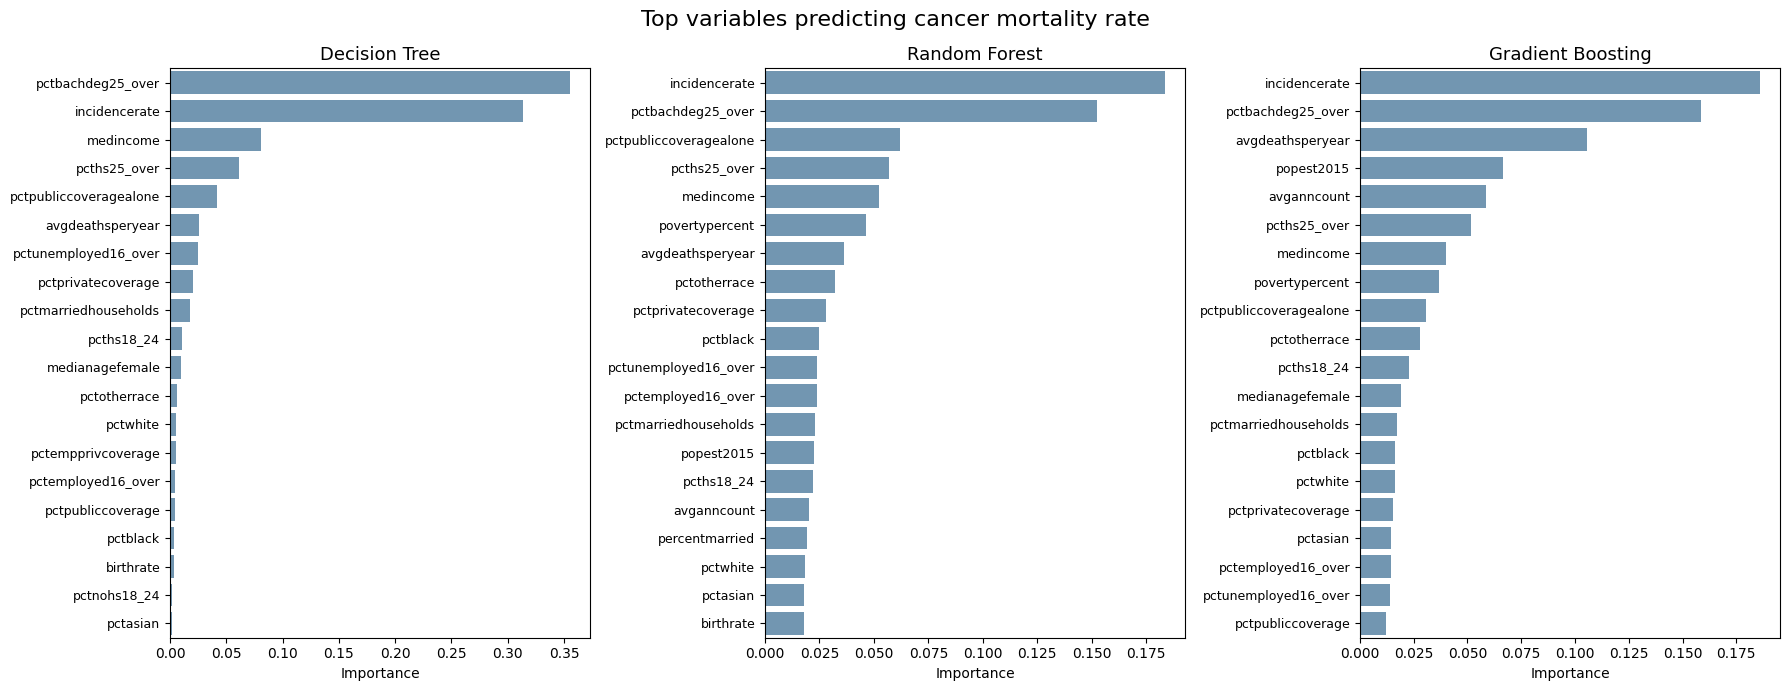

In [36]:
top_n = 10
models = {
    "Decision Tree": decision_tree_best,
    "Random Forest": random_forest_best,
    "Gradient Boosting": gradient_boosting_best
}

fig, axes = plt.subplots(1, 3, figsize=(18, 7), sharex=False)

for ax, (name, pipe) in zip(axes, models.items()):
    fi = get_feature_importance(pipe, top_k = 20)

    sns.barplot(
        data=fi,
        x="Importance",
        y="Feature",
        color="#6897bb",
        ax=ax
    )

    ax.set_title(name, fontsize=13)
    ax.set_xlabel("Importance")
    ax.set_ylabel("")
    ax.tick_params(axis="y", labelsize=9)

plt.suptitle("Top variables predicting cancer mortality rate", fontsize=16)
plt.tight_layout()
plt.show()


The feature importance plots highlight both consistent and model-specific drivers of cancer mortality across the three tree-based models. In all approaches, incidence rate (incidencerate) and educational attainment (pctbachdeg25_over) seems to be the most influential predictors, showing that both disease prevalance and socioeconomic conditions play a central role in explaining counties differences in cancer mortality.

While the decision tree model concentrates on a small number of key variables, the random forest and gradient boosting models rely on a broader set of features drawn from socioeconomic, healthcare access and demographic factors. This reflects the ability of ensemble models to capture more complex and distributed relationships in the data.

# 7. Comparison of empirical results with the literature

Above gradient boosting model for county-level cancer mortality achieved an R^2 of approximately 0.70 (with RMSE around 15.6), clearly outperforming the baseline model (R^2 close to 0). This level of explained variance is substantial in the context of population health modeling. Similar studies often report worse predictive performance. For example, a machine learning model predicting U.S. lung cancer mortality at the county level achieved an R^2 of only 0.42 using a random forest model, although with a lower RMSE of 12.8 (Hashtarkhani et al., 2025). Even when advanced ensemble methods are applied to lung cancer data, researchers typically report no more than about 61% of variance explained on test data (Ahmed et al., 2021).

For overall cancer mortality, a recent study conducted in Brazil using extreme gradint boosting reported a best test R^2 of approximately 0.65 with an RMSE of 15.2 (Teixeira et al., 2023), which is comparable to our result. Based on these comparisons, the performance of our model can be considered very good and the obtained level of fit is well within the range reported in the literature.

The most important predictors identified by our model align with factors highlighted in the literature. The cancer incidence rate emerged as the most influential predictor, which is intuitive and supported by prior studies. A global analysis found that age-standarized cancer incidence rates are strongly correlated with cancer mortality (r around 0.75) and represent the single most important feature in mortality prediction (Sadeghi & Seif, 2025). In other words, regions with higher numbers of cancer cases tend to experience higher cancer mortality.

Socioeconomic variables such as education and income also play a crucial role in explaining cancer mortality differences, which is consistent with extensive evidence on the social determinants of health. Educational attainment, which is emerged as the second most important predictor in our model, was somewhat unexpected. Initially, we hypothesized that education might influence cancer mortality mainly through increased awereness and participation in preventive screening. However, the literature consistently shows that lower educational attainment is directly associated with higher cancer mortality. Limited access to healthcare is often identified as a key mechanism linking low socioeconomics status to worse cancer outcomes. Previous studies indicate that resource-poor and rural areas tend to have fewer oncology providers and screening facilities, which leads to delayed diagnoses and higher mortality rates (Ponnamma Mohan et al., 2025).

Demographic characteristics also contribute to regional differences in cancer mortality, although their importance is secondary to socioeconomic and healthcare-related factors. Prior research shows that population composition, including age structure and racial or ethnic makeup is associated with cancer outcomes due to differences in risk exposure, acces to care and regional development (Hashtarkhani et al., 2025).

Overall, the empirical results are higly consistent with prior research on cancer mortality and population health. Education, income and healthcare access repeatedly appear in the literature as key social determinants of cancer mortality, and these same factors are identified as important predictors in our models. 

# 8. Summary and conclusions

The results of this project show that gradient boosting is the best-performing model for predicting county-level cancer mortality. It has the lower prediction error (RMSE around 15.6) and the highest explanatory power (R^2 around 0.70) on test data, clearly outperforming both the baseline model and the other tree-based approaches. Random forest also performs well and improves clearly over the decision tree, but it is consistently outperformed by gradient boosting. The decision tree model performed the worst, but it had better results than the baseline model.

Overall, the empirical findings are strongly aligned with existing literature on cancer mortality and population health. These results support the importance of health-related and socio-demographic data, and provide confidence in both the modeling approach and the interpretaion of the results.

## 8.1. Ethical considerations

This project models cancer mortality at the county level, which raises important ethical considerations related to interpretation and potential misuse od the results. The error analysis shows that the model tends to underestimate cancer mortality in some high-risk counties. If such a model were used in practice for policy or resource allocation, systematic underestimation could lead to insufficient funding for healthcare services and prevention programs in areas with the greatest need. Therefore, the results should be interpreted with caution and used only for analytical and educational purposes, as the model captures statistical patterns in historical data rather than providing a reliable basis for public health decision-making.

# 9. Bibliography

1. Ahmed, Z. U., Sun, K., Shelly, M., & Mu, L. (2021). Explainable artificial intelligence (XAI) for exploring spatial variability of lung and bronchus cancer (LBC) mortality rates in the contiguous USA. Scientific reports, 11(1), 24090.

2. Hashtarkhani, S., White, B. M., Hoseini, B., Schwartz, D. L., & Shaban-Nejad, A. (2025). Comparative Evaluation of Explainable Machine Learning Versus Linear Regression for Predicting County-Level Lung Cancer Mortality Rate in the United States. JCO Clinical Cancer Informatics, 9, e2400310.

3. Ponnamma Mohan, M., Epstein, J. B., Meleveedu, K. S., Pili, R., & Satheeshkumar, P. S. (2025). Counties with Low Employment and Education Status Are Associated with Higher Age-Adjusted Cancer Mortality. Cancers, 17(12), 2051.

4. Sadeghi, H., & Seif, F. (2025). Predicting cancer mortality using machine learning methods: a global vs. Iran analysis. BMC cancer, 25(1), 1329.

5. scikit-learn developers. (2024). DummyRegressor. In scikit-learn documentation. https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

6. Teixeira, B. C., Toporcov, T. N., Chiaravalloti-Neto, F., & Chiavegatto Filho, A. D. P. (2023). Spatial clusters of Cancer mortality in Brazil: a machine learning modeling approach. International Journal of Public Health, 68, 1604789.